# Binary Classification using PyTorch

## 1 Creating the data

In [1]:
import torch.cuda
from sklearn.datasets import make_circles
from torch.utils.benchmark.utils.compare import optional_min

n_sample=1000

X,y=make_circles(  n_samples =n_sample,noise=0.02,random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
X[:5],y[:5]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737]]),
 array([1, 1, 1, 1, 0]))

In [4]:
#2 input and 1 output
import pandas as pd
circles=pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "Labels": y
})
circles

,X1,X2,Labels
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


In [5]:
import matplotlib.pyplot as plt


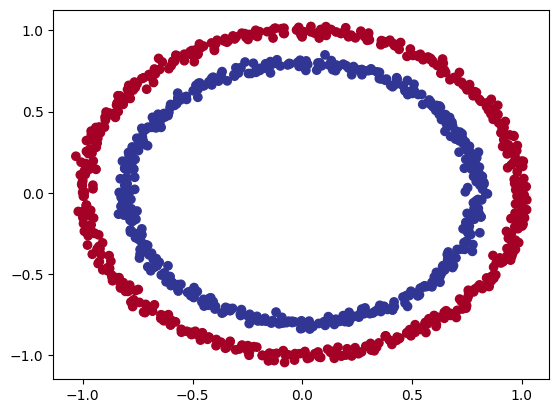

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
# training and splitting the data

train_split=int(0.8*len(X))

X_train=X[:train_split]
X_test=X[train_split:]

y_train=y[:train_split]
y_test=y[train_split:]

len(X_train),len(y_train),len(y_test),len(X_test)

(800, 800, 200, 200)

## Data exploring

In [8]:
X[:10],y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [9]:
X.shape,y.shape

((1000, 2), (1000,))

## turn data into Tensor

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [12]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

## Training and building model

In [14]:
import torch
from torch import nn

In [15]:
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)    #takes input and give output to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1)    #takes input from layer1 and give the output

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.layer_2(self.layer_1(x))



model_0=CircleClassifier().to(device)
model_0


CircleClassifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3683,  0.5030],
                      [-0.5739,  0.6993],
                      [-0.5001,  0.1426],
                      [ 0.2985,  0.3017],
                      [-0.6587, -0.2822]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2919,  0.0867, -0.3288,  0.2024,  0.1607], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2866, -0.0034, -0.1487,  0.0122,  0.3814]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.3148], device='cuda:0'))])

In [17]:
model_0_sequential=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1),
).to(device)



In [18]:
model_0_sequential.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3183,  0.5268],
                      [ 0.1811, -0.1250],
                      [ 0.6381,  0.5957],
                      [-0.5176, -0.4888],
                      [ 0.3628,  0.6185]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0446, -0.4199,  0.1513,  0.5297, -0.6273], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1424, -0.2057,  0.4057, -0.0660,  0.4164]], device='cuda:0')),
             ('1.bias', tensor([0.0387], device='cuda:0'))])

In [19]:
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid+BCE_loss

optimizer=torch.optim.SGD(
    model_0.parameters(),
    lr=0.1
)


In [20]:
def accuracy_fn(y_true, y_preds):
    correct=torch.eq(y_true,y_preds)
    acc=(correct/len(y_preds))*100
    return acc

## Training the model


In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
model_0=CircleClassifier().to(device)
# model_0.to(device)
for epoch in range(epochs):
    model_0.train()

    # Forward Pass
    y_logits=model_0(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    #Calculate loss and accuracy
    loss=loss_fn(y_logits,   #expect y_logits not prediction
                 y_train)
    acc=accuracy_fn(y_train, y_preds)


    #optimerzer zero grad
    optimizer.zero_grad()

    #back-propagation
    loss.backward()

    #Gradiennt descent
    optimizer.step()

    #testing our data
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))

        #calculate loss
        test_loss=loss_fn(test_logits,  #prediction
                          y_test       #accuracy
                          )
        test_acc=accuracy_fn(y_test, test_preds)
        if epoch%20 == 0:
            print(f"epoch: {epoch},loss: {loss:.4f} ")




epoch: 0,loss: 0.6957 
epoch: 20,loss: 0.6957 
epoch: 40,loss: 0.6957 
epoch: 60,loss: 0.6957 
epoch: 80,loss: 0.6957 
epoch: 100,loss: 0.6957 
epoch: 120,loss: 0.6957 
epoch: 140,loss: 0.6957 
epoch: 160,loss: 0.6957 
epoch: 180,loss: 0.6957 
epoch: 200,loss: 0.6957 
epoch: 220,loss: 0.6957 
epoch: 240,loss: 0.6957 
epoch: 260,loss: 0.6957 
epoch: 280,loss: 0.6957 
epoch: 300,loss: 0.6957 
epoch: 320,loss: 0.6957 
epoch: 340,loss: 0.6957 
epoch: 360,loss: 0.6957 
epoch: 380,loss: 0.6957 
epoch: 400,loss: 0.6957 
epoch: 420,loss: 0.6957 
epoch: 440,loss: 0.6957 
epoch: 460,loss: 0.6957 
epoch: 480,loss: 0.6957 
epoch: 500,loss: 0.6957 
epoch: 520,loss: 0.6957 
epoch: 540,loss: 0.6957 
epoch: 560,loss: 0.6957 
epoch: 580,loss: 0.6957 
epoch: 600,loss: 0.6957 
epoch: 620,loss: 0.6957 
epoch: 640,loss: 0.6957 
epoch: 660,loss: 0.6957 
epoch: 680,loss: 0.6957 
epoch: 700,loss: 0.6957 
epoch: 720,loss: 0.6957 
epoch: 740,loss: 0.6957 
epoch: 760,loss: 0.6957 
epoch: 780,loss: 0.6957 
epoch:

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


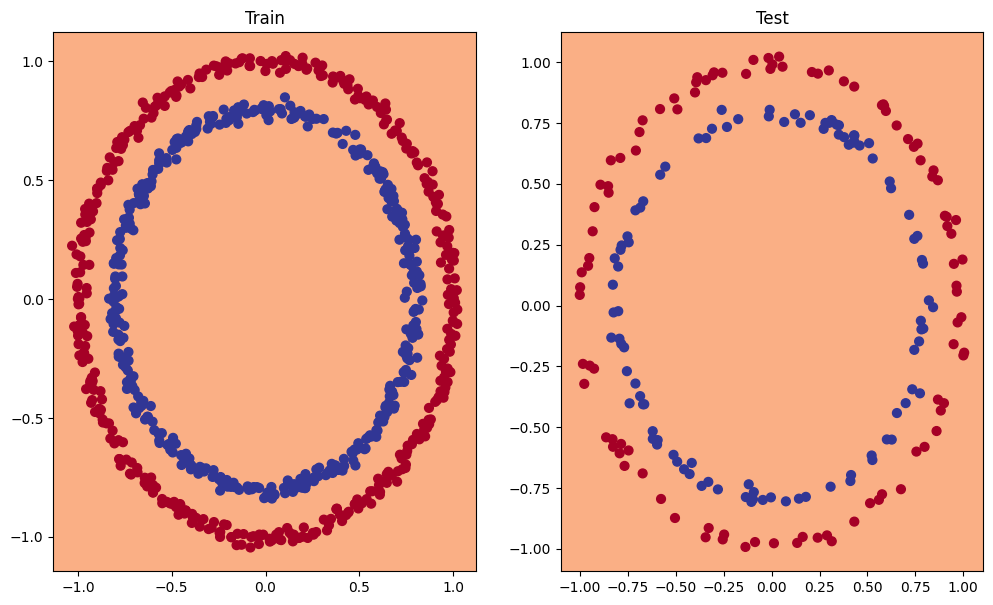

In [23]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


How to check if data fit in **Linear / Straight Line**
1. test it on Smaller Problem

In [24]:
model_1=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
# Adding non-Linear dataset
class CircleClassifierV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=8)
        self.layer_2=nn.Linear(in_features=8,out_features=8)
        self.layer_3=nn.Linear(in_features=8,out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_2=CircleClassifierV1().to(device)
model_2

CircleClassifierV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [26]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)

In [27]:
epochs=2000
# model_2=CircleClassifierV1().to(device)
for epoch in range(epochs):
    model_2.train()

    y_logits=model_2(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))
    loss=loss_fn(y_logits, y_train)
    acc=accuracy_fn(y_train, y_preds)


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_logits=model_2(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits, y_test )
        test_acc=accuracy_fn(y_test, test_preds)

    if(epoch%20 == 0):
        print(f"epoch: {epoch},loss: {loss:.4f} ")


epoch: 0,loss: 0.6922 
epoch: 20,loss: 0.6893 
epoch: 40,loss: 0.6883 
epoch: 60,loss: 0.6874 
epoch: 80,loss: 0.6865 
epoch: 100,loss: 0.6856 
epoch: 120,loss: 0.6846 
epoch: 140,loss: 0.6833 
epoch: 160,loss: 0.6817 
epoch: 180,loss: 0.6805 
epoch: 200,loss: 0.6793 
epoch: 220,loss: 0.6779 
epoch: 240,loss: 0.6765 
epoch: 260,loss: 0.6748 
epoch: 280,loss: 0.6729 
epoch: 300,loss: 0.6708 
epoch: 320,loss: 0.6685 
epoch: 340,loss: 0.6658 
epoch: 360,loss: 0.6628 
epoch: 380,loss: 0.6594 
epoch: 400,loss: 0.6556 
epoch: 420,loss: 0.6513 
epoch: 440,loss: 0.6464 
epoch: 460,loss: 0.6409 
epoch: 480,loss: 0.6346 
epoch: 500,loss: 0.6273 
epoch: 520,loss: 0.6190 
epoch: 540,loss: 0.6095 
epoch: 560,loss: 0.5986 
epoch: 580,loss: 0.5861 
epoch: 600,loss: 0.5720 
epoch: 620,loss: 0.5559 
epoch: 640,loss: 0.5376 
epoch: 660,loss: 0.5173 
epoch: 680,loss: 0.4948 
epoch: 700,loss: 0.4705 
epoch: 720,loss: 0.4445 
epoch: 740,loss: 0.4172 
epoch: 760,loss: 0.3888 
epoch: 780,loss: 0.3598 
epoch:

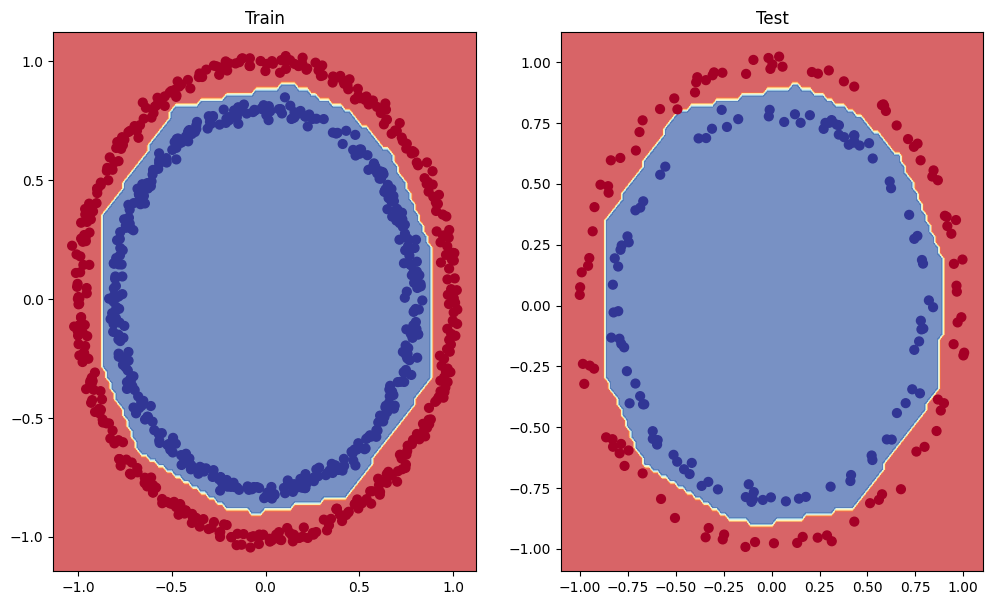

In [28]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

plt.show()


# Multiclass Classification using PyTorch

In [33]:
# creating a toy muticlass dataset
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

n_sample=1000
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42
device= "cuda" if torch.cuda.is_available() else "cpu"

In [34]:
X_blob,y_blob=make_blobs(n_samples=n_sample,
                         random_state=RANDOM_SEED,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5
                         )

len(X_blob),len(y_blob)

(1000, 1000)

In [35]:
X_blob=torch.from_numpy(X_blob).float()
y_blob=torch.from_numpy(y_blob).float()

X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,test_size=0.2)


len(X_blob_train),len(X_blob_test),len(y_blob_train),len(y_blob_test)

(800, 200, 800, 200)

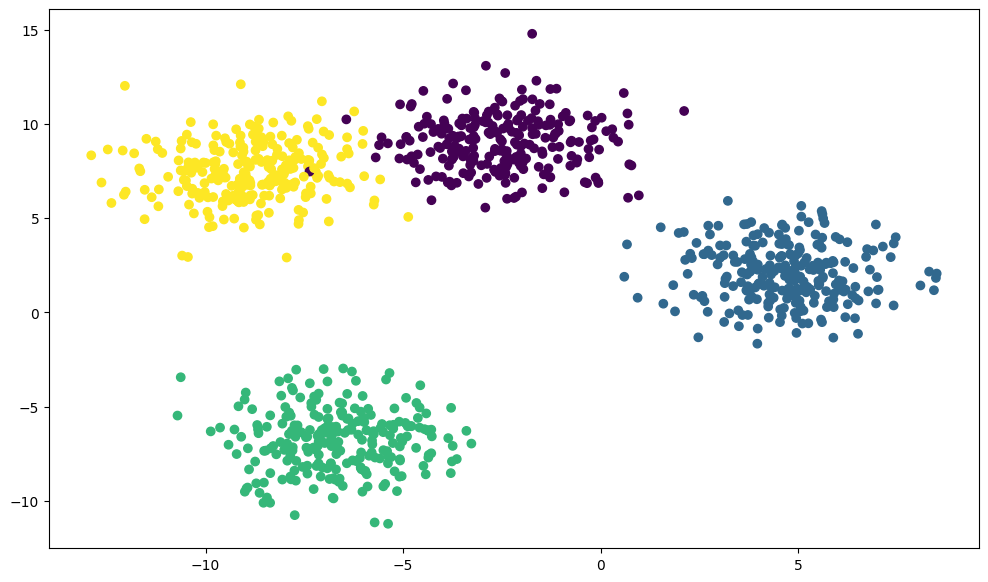

In [36]:
plt.figure(figsize=(12,7))

plt.scatter(X_blob[:,0],
        X_blob[:,1],
        c=y_blob
        )

## Building Multiclass Model

In [37]:
dee ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [38]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.Linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )

    def forward(self,x):
        return self.Linear_layer_stack(x)


model_4=BlobModel(input_features=2,
                  output_features=4,
        ).to(device)
model_4


BlobModel(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [39]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(
    model_4.parameters(),
    lr=0.1
)

logits->pred probalblities -> probablity

Here activation is SoftMax

In [40]:
model_4.eval()
with torch.inference_mode():

    y_logits=model_4(X_blob_train.to(device))
    y_preds=torch.softmax(y_logits,dim=1)

print(y_logits)
print(y_preds)

tensor([[-0.1621, -1.0816, -0.7575, -0.1908],
        [-0.0879, -0.9208, -0.5786, -0.1350],
        [-0.1608, -1.0823, -0.7460, -0.1814],
        ...,
        [-0.3300, -1.4321, -1.1957, -0.3500],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.3293, -1.4233, -1.2117, -0.3672]], device='cuda:0')
tensor([[0.3423, 0.1365, 0.1887, 0.3326],
        [0.3332, 0.1449, 0.2040, 0.3179],
        [0.3408, 0.1356, 0.1898, 0.3338],
        ...,
        [0.3659, 0.1215, 0.1540, 0.3586],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3688, 0.1235, 0.1526, 0.3551]], device='cuda:0')


In [41]:
epochs=1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.type(torch.LongTensor).to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.type(torch.LongTensor).to(device)

for epoch in range(epochs):
    model_4.train()

    y_logits=model_4(X_blob_train.to(device))
    y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1).to(device)

    loss=loss_fn(y_logits, y_blob_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()

    with torch.inference_mode():
        test_logits=model_4(X_blob_test.to(device))
        test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss=loss_fn(test_logits, y_blob_test)

    if(epoch%100== 0):
        print(f"epoch: {epoch},loss: {loss:.4f} ,test_loss: {test_loss:.4f}")


epoch: 0,loss: 1.1577 ,test_loss: 1.0683
epoch: 100,loss: 0.0271 ,test_loss: 0.0450
epoch: 200,loss: 0.0194 ,test_loss: 0.0454
epoch: 300,loss: 0.0173 ,test_loss: 0.0474
epoch: 400,loss: 0.0163 ,test_loss: 0.0490
epoch: 500,loss: 0.0157 ,test_loss: 0.0502
epoch: 600,loss: 0.0153 ,test_loss: 0.0511
epoch: 700,loss: 0.0149 ,test_loss: 0.0518
epoch: 800,loss: 0.0147 ,test_loss: 0.0522
epoch: 900,loss: 0.0144 ,test_loss: 0.0525


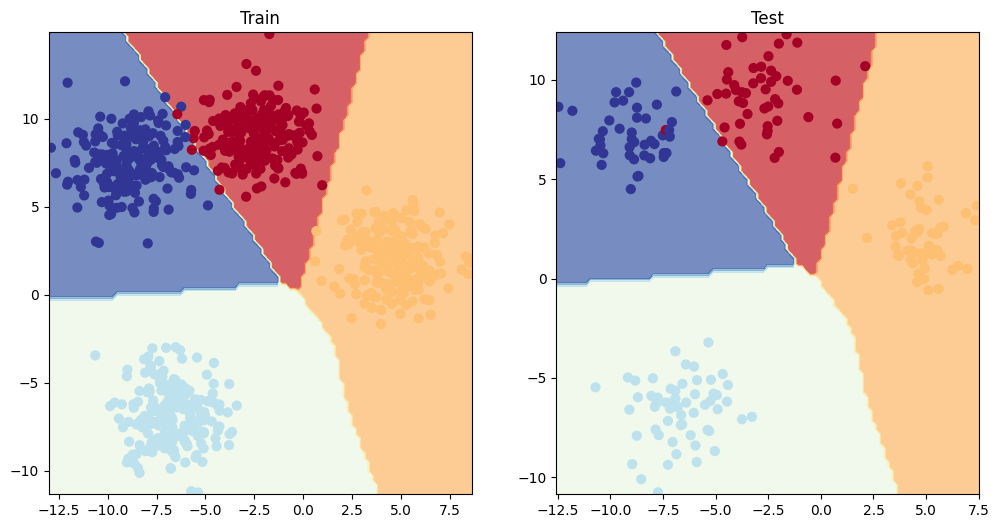

In [42]:
from helper_functions import  plot_decision_boundary
plt.figure(figsize=(12,6 ))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## Evaluating Classficiation

1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. Confusion Matrix
6. Classfication Report

In [43]:
# !pip install torchmetrics

In [44]:
 model_4.eval()
X_blob_test.to(device)
y_blob_test.to(device)
model_4.to(device)
with torch.inference_mode():
    y_logits=model_4(X_blob_test)
    y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1).to(device)

y_preds[:10],y_blob_test[:10]

(tensor([1, 2, 0, 2, 2, 2, 1, 1, 3, 1], device='cuda:0'),
 tensor([1, 2, 0, 2, 2, 2, 1, 1, 3, 1], device='cuda:0'))

In [45]:
from torchmetrics import F1Score

metric=F1Score(task="multiclass",num_classes=4).to(device)

metric(y_blob_test, y_preds)

tensor(0.9900, device='cuda:0')